In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Guardamos posiciones y masas de las galaxias de gadget

In [3]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')

atime = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_496.h5py', 'r')

for i in range(0,2):
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

    pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'].value

    z = a0/aexp[0] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[0]/h
    ystr = (pstr[:,1]-cm[1])*aexp[0]/h
    zstr = (pstr[:,2]-cm[2])*aexp[0]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[0]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[0]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[0]) + Ht *zstr/1000.

#----------------------masas----------------------------
    mstr = mstr/h

    r200 = r200*aexp[0]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]             

#--------------------------------------------         
    veloc,=np.where(r<r50)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r90)

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([4,np.size(xn)])
    pos[0,:]=xn
    pos[1,:]=yn
    pos[2,:]=zn
    pos[3,:]=mstr

    np.savetxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_pos-mass.dat', pos, fmt='%12.6f')


### Guardamos los datos de masa y posicion de las particulas(estrellas) de gasoline

In [6]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np



a0=1
vector2 = ('M31','MW','M33')
vector = (1,2,4)

snap = h5py.File('/home/ornela/SimCLUES/Gasoline/outputs2/snap_1024.h5py', 'r')

for i in range(0,2):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]-cm[0]
    ystr = pstr[:,1]-cm[1]
    zstr = pstr[:,2]-cm[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0]
    v_y = vel[:,1]
    v_z = vel[:,2]

#----------------------masas----------------------------
    r200 = r200*aexp
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]
    M90 = Mc_str[noventa]                

#------------------masa total en r200 (Mvir)--------------------------         
    veloc,=np.where(r<r50)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r90)

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([4,np.size(xn)])
    pos[0,:]=xn
    pos[1,:]=yn
    pos[2,:]=zn
    pos[3,:]=mstr

    np.savetxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_pos-mass.dat', pos, fmt='%12.6f')


In [2]:
import sphviewer as sph
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


M31_gd  = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_pos-mass.dat')
x_M31gd = M31_gd[0,:]
y_M31gd = M31_gd[1,:]
z_M31gd = M31_gd[2,:]
m_M31gd = M31_gd[3,:]

MW_gd  = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/MW_pos-mass.dat')
x_MWgd = MW_gd[0,:]
y_MWgd = MW_gd[1,:]
z_MWgd = MW_gd[2,:]
m_MWgd = MW_gd[3,:]

M31_gs  = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_pos-mass.dat')
x_M31gs = M31_gs[0,:]
y_M31gs = M31_gs[1,:]
z_M31gs = M31_gs[2,:]
m_M31gs = M31_gs[3,:]

MW_gs  = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_pos-mass.dat')
x_MWgs = MW_gs[0,:]
y_MWgs = MW_gs[1,:]
z_MWgs = MW_gs[2,:]
m_MWgs = MW_gs[3,:]



#---------------------generador del gráfico-----------------
rl=6   
corte1,=np.where((x_M31gd <rl) & (y_M31gd <rl) & (z_M31gd <rl) & (x_M31gd >-rl) & (y_M31gd >-rl) & (z_M31gd >-rl))
corte2,=np.where((x_MWgd <rl) & (y_MWgd <rl) & (z_MWgd <rl) & (x_MWgd >-rl) & (y_MWgd >-rl) & (z_MWgd >-rl))
corte3,=np.where((x_M31gs <rl) & (y_M31gs <rl) & (z_M31gs <rl) & (x_M31gs >-rl) & (y_M31gs >-rl) & (z_M31gs >-rl))
corte4,=np.where((x_MWgs <rl) & (y_MWgs <rl) & (z_MWgs <rl) & (x_MWgs >-rl) & (y_MWgs >-rl) & (z_MWgs >-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='gnuplot'


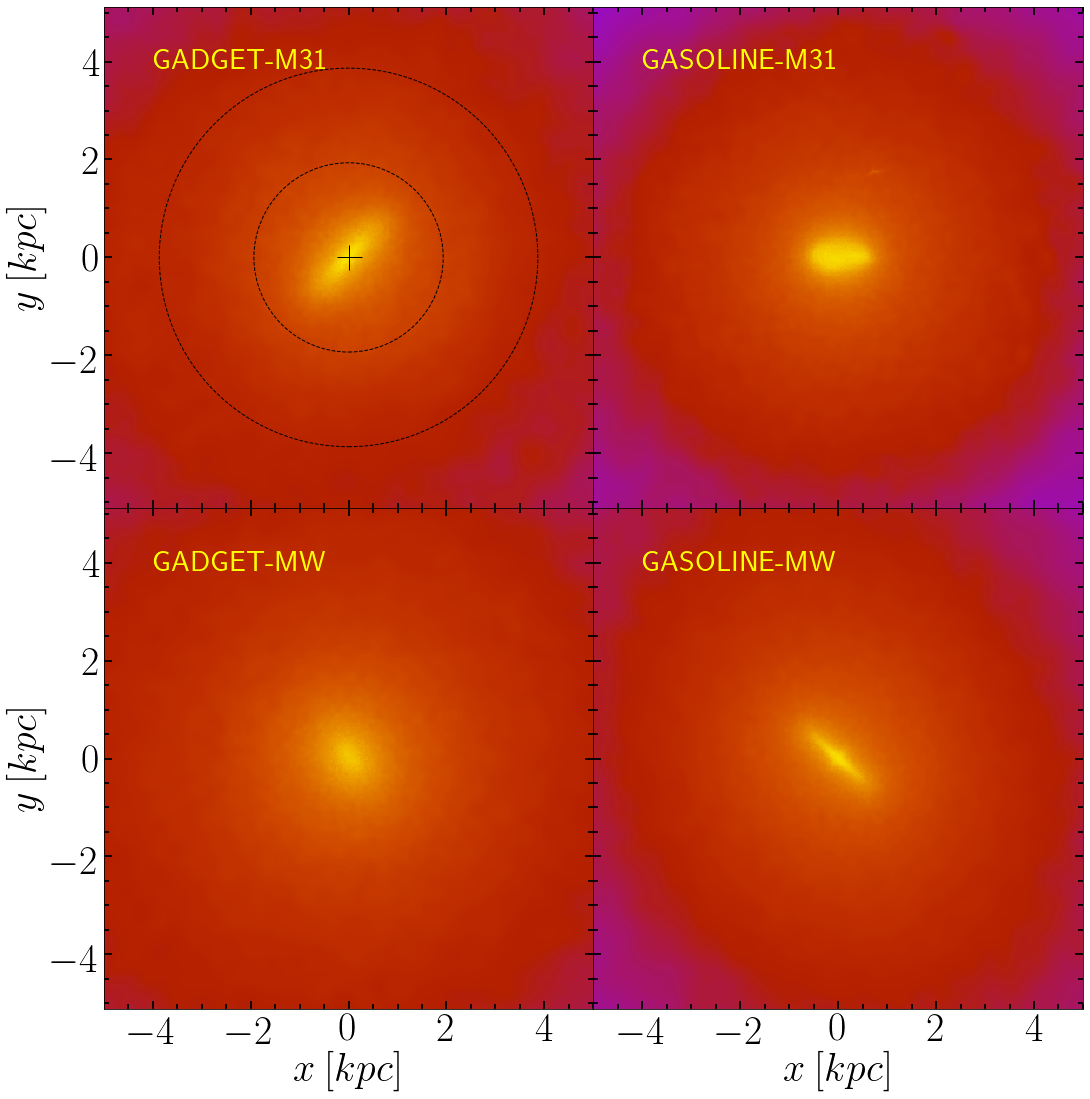

In [11]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
import matplotlib.patches as patches


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16),sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(M31_gd[:3,corte1],m_M31gd[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
# ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$y\:[kpc]$', fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,0].add_patch(patches.Circle((0,0), radius=1.932973, fill=False, color='k', ls='--'))
ax[0,0].add_patch(patches.Circle((0,0), radius=2*1.932973, fill=False, color='k', ls='--'))
ax[0,0].plot(0,0,'k+', markersize=25, color='k')

#---------------------------------

particles=sph.Particles(M31_gs[:3,corte3],m_M31gs[corte3],nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[0,1].set_xlim(-5,5)
# ax[0,1].set_ylim(-5,5)
# ax[0,1].set_xticklabels([])
# ax[0,1].set_yticklabels([])
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].text(-4, 4,'GASOLINE-M31', fontsize=30, color='yellow', ha='left', va='center') 

#---------------------------------

particles=sph.Particles(MW_gd[:3,corte2],m_MWgd[corte2]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax3=fig.add_subplot(223)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,0].set_xlim(-5,5)
# ax[1,0].set_ylim(-5,5)
ax[1,0].set_xticks([-4,-2,0,2,4])
ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,0].set_ylabel('$y\:[kpc]$', fontsize=40)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,0].text(-4, 4,'GADGET-MW', fontsize=30, color='yellow', ha='left', va='center') 

#---------------------------------

particles=sph.Particles(MW_gs[:3,corte4],m_MWgs[corte4],nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax4=fig.add_subplot(224)
ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,1].set_xlim(-5,5)
# ax[1,1].set_ylim(-5,5)
# ax[1,1].set_yticklabels([])
ax[1,1].set_xticks([-4,-2,0,2,4])
ax[1,1].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,1].text(-4, 4,'GASOLINE-MW', fontsize=30, color='yellow', ha='left', va='center') 

# fig.savefig('/home/ornela/Dropbox/Presentacion_graficos/Barras.png', dpi = 100, xxbox_inches='tight')
plt.show()
